## Task 1 - Optimal Transport in 1D

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from cycler import cycler
from matplotlib import rcParams
from matplotlib.cm import get_cmap
from math import sqrt

### Set Normal Distributions

In [2]:
mu_1, sigma_1 = 25, 5 # mean and standard deviation
mu_2, sigma_2 = 100, 10 # mean and standard deviation
num_samples = 10000 # num samples

# Distribution 1
x_1 = np.random.normal(mu_1, sigma_1, num_samples)
y_1 = stats.norm.pdf(x_1, mu_1, sigma_1)
x_1, y_1 = zip(*sorted(zip(x_1, y_1)))
x_1, y_1 = np.asarray(x_1), np.asarray(y_1)


# Distribution 2
x_2 = np.random.normal(mu_2, sigma_2, num_samples)
y_2 = stats.norm.pdf(x_2, mu_2, sigma_2)
x_2, y_2 = zip(*sorted(zip(x_2, y_2)))
x_2, y_2 = np.asarray(x_2), np.asarray(y_2)


### 2-Wasserstein distance calculation (closed-form vs. sampled)

In [3]:
# Closed form 2-Wasserstein:
closed_Wasserstein = abs(mu_1-mu_2) +  (sigma_1 + sigma_2 - 2 * sqrt(sigma_2*sigma_1))

# Sampled 2-Wasserstein
x_distances = np.abs(x_1 - x_2)
sampled_Wasserstein = np.average(x_distances)

print("Closed form solution:    " + str(closed_Wasserstein))
print("Sampled solution:        " + str(sampled_Wasserstein))

Closed form solution:    75.85786437626905
Sampled solution:        75.00290198033832


We can see that the closed form solution and the sampled solution are very similar.

### Plot Distributions

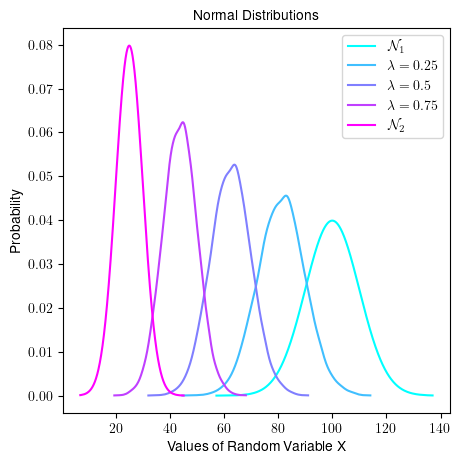

In [9]:
plt.figure(figsize=(5,5))

# Lambdas
lambdas = np.array([0.25, 0.5, 0.75])

# Set colormap
cmap = get_cmap('cool')
colors = np.array(list(map(cmap, np.linspace(0.0, 1.0, (lambdas.size + 2)))))

cmap(i)
rcParams['axes.prop_cycle'] = cycler(color=colors)

# Allow latex
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

plt.plot(x_2, y_2, label= "$\mathcal{N}_1$")
# Generate and plot interpolated samples alongside distributions 1 and 2
for lamb in lambdas:
    z = lamb * x_1 + (1.0-lamb) * x_2
    kde = stats.gaussian_kde(z)
    plt.plot(z, kde(z), label= "$\lambda={}$".format(lamb))

plt.plot(x_1, y_1, label= "$\mathcal{N}_2$")
plt.title('Normal Distributions', fontsize='10')
plt.xlabel('Values of Random Variable X', fontsize='10')
plt.ylabel('Probability', fontsize='10')
plt.legend()
plt.show()